In [292]:
from main import train_cnce, get_cifar10_data, DEM, DATA_DIM, device, get_mnist_data
import numpy as np
import scipy
import torch
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [276]:
cifar_train, cifar_test, cifar_mean = get_cifar10_data("../../data/")

# Create noisy examples (add gaussian noise)
noise_multiplier = 0.5
noise_train = cifar_train + np.random.normal(size=cifar_train.shape) * noise_multiplier
noise_train /= (np.linalg.norm(noise_train, axis=1) / np.linalg.norm(cifar_train, axis=1))[:, np.newaxis]

noise_test = cifar_test + np.random.normal(size=cifar_test.shape) * noise_multiplier
noise_test /= (np.linalg.norm(noise_test, axis=1) / np.linalg.norm(cifar_test, axis=1))[:, np.newaxis]

Files already downloaded and verified
Files already downloaded and verified


In [253]:
print(cifar_train.mean(axis=0).mean(), cifar_train.std(axis=0).mean())
print(noise_train.mean(axis=0).mean(), noise_train.std(axis=0).mean())
print(cifar_test.mean(axis=0).mean(), cifar_test.std(axis=0).mean())
print(noise_test.mean(axis=0).mean(), noise_test.std(axis=0).mean())

-9.259387797316492e-15 0.23456230782702905
0.0005335583104421767 0.2346681313010135
0.0030289990996305955 0.23400577331603406
0.0034136522611620795 0.2341038157002497


In [280]:
np.linalg.norm(noise_test, axis=1) / np.linalg.norm(cifar_test, axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

Text(0.5, 1.0, 'noise sample (with added mean)')

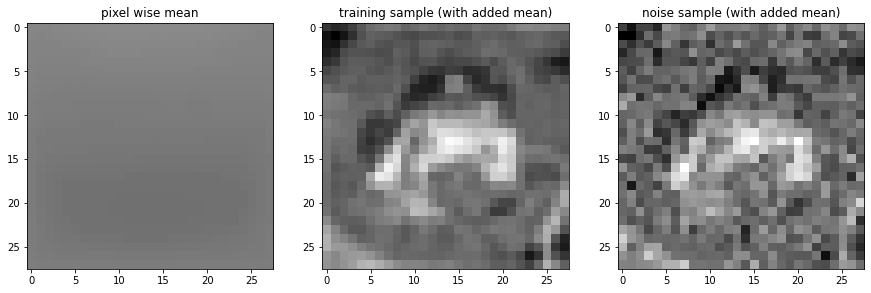

In [255]:
fig, axs = plt.subplots(1,3, figsize=(15, 15))
axs[0].imshow(cifar_mean.reshape((28 ,28)), cmap='gray', vmin=0, vmax=1)
axs[0].set_title("pixel wise mean")
axs[1].imshow((cifar_mean + cifar_train[0]).reshape((28 ,28)), cmap='gray', vmin=0, vmax=1)
axs[1].set_title("training sample (with added mean)")
axs[2].imshow((cifar_mean + noise_train[0]).reshape((28 ,28)), cmap='gray', vmin=0, vmax=1)
axs[2].set_title("noise sample (with added mean)")

## Train

In [267]:
model, losses = train_cnce(batch_size=1000, cifar10_data_path="../../data/", sigma=1.0, noise_multiplier=0.5,
                           max_steps=5000)

Files already downloaded and verified
Files already downloaded and verified
Loaded 50000 training examples
0: Loss: 8.048002902791621
Evaluating...
	loss avg: 8.944615054997517	loss std: 0.23651752196497883
100: Loss: 1.007351927678079
200: Loss: 0.3219631299563567
300: Loss: 0.16645565659908645
400: Loss: 0.10296015627374999
500: Loss: 0.06423297926458173
600: Loss: 0.04108550704727177
700: Loss: 0.026466683013722944
800: Loss: 0.01700227725299775
900: Loss: 0.011907594784289882
1000: Loss: 0.008952481729721875
Evaluating...
	loss avg: 0.06419360130464936	loss std: 0.026463987527726204
1100: Loss: 0.006804745148484707
1200: Loss: 0.005018447885196952
1300: Loss: 0.0034671377510227725
1400: Loss: 0.002247512369932425
1500: Loss: 0.001500465755640995
1600: Loss: 0.0011104635172173689
1700: Loss: 0.0008867260690458966
1800: Loss: 0.0007412722409649289
1900: Loss: 0.0006390337358572162
2000: Loss: 0.0005624743942076169
Evaluating...
	loss avg: 0.04848638521112536	loss std: 0.0245022623125

## Inspect and evaluate

In [283]:
def plot_filters(V):
    num_filters = V.shape[0]
    num_columns = 8
    num_rows = num_filters // num_columns
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 15))
    for k in range(num_filters):
        axs[k // num_columns, k % num_columns].imshow(V[k].reshape((28 ,28)), cmap='gray')
        
def evaluate(samples):
    log_probs = model(torch.tensor(samples, device=device)).cpu().detach().numpy()
    print(f"Mean log_p_theta(x): {log_probs.mean()}")
    print(f"Std log_p_theta(x): {log_probs.std()}")

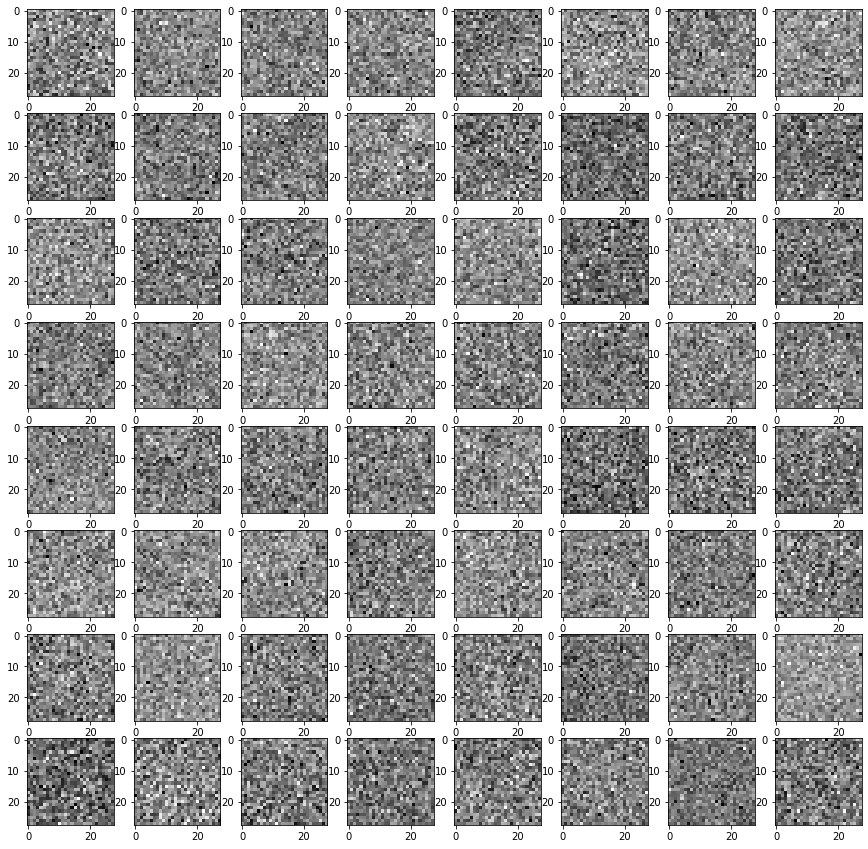

In [268]:
plot_filters(model.V.cpu().detach().numpy())

In [284]:
evaluate(cifar_train)

Mean log_p_theta(x): 148.54527379180644
Std log_p_theta(x): 16.501087568176075


In [285]:
evaluate(cifar_test)

Mean log_p_theta(x): 148.32078825020255
Std log_p_theta(x): 16.53303491133649


In [287]:
evaluate(noise_train)

Mean log_p_theta(x): 115.5200049122248
Std log_p_theta(x): 15.91697642589233


In [294]:
mnist_train, mnist_test, mnist_mean = get_mnist_data("../../data")

In [295]:
evaluate(mnist_test)

Mean log_p_theta(x): 112.65578423745164
Std log_p_theta(x): 11.113509140532873


In [291]:
model.c

Parameter containing:
tensor([ 0.2270, -0.1068,  0.1576, -0.1346, -0.1412, -0.0750,  0.0586, -0.2869,
         0.0871, -0.1370, -0.1240, -0.3234,  0.0498,  0.0572, -0.0564,  0.2081,
        -0.1951, -0.0879, -0.1057, -0.2447,  0.2137, -0.0221,  0.2207,  0.2094,
         0.1745,  0.1488, -0.1343, -0.1037, -0.0894, -0.1570,  0.0392,  0.1443,
         0.0082,  0.1053, -0.0437, -0.0775, -0.1139,  0.1507,  0.2204,  0.1179,
         0.0132,  0.2074, -0.3042,  0.1908,  0.2301,  0.1611,  0.0350, -0.1163,
        -0.0879, -0.0197, -0.0607, -0.0603, -0.1666, -0.0112,  0.1986, -0.0925,
        -0.1652, -0.1756,  0.1443, -0.1020, -0.1403, -0.0761,  0.1637, -0.0286],
       device='cuda:0', dtype=torch.float64, requires_grad=True)